<a href="https://colab.research.google.com/github/DeepakCGowda07/ML-projects/blob/main/diabetes_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm#squared vector matrix
from sklearn.metrics import accuracy_score as ac

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression


In [3]:
#LOAD DATASET
db=pd.read_csv('/content/diabetes.csv')
db

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


data analysis


In [4]:
#printing first 5 dtasets
db.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:

#number of rows and columns in datset
db.shape
db.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [6]:
#stastical measures of data
db.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


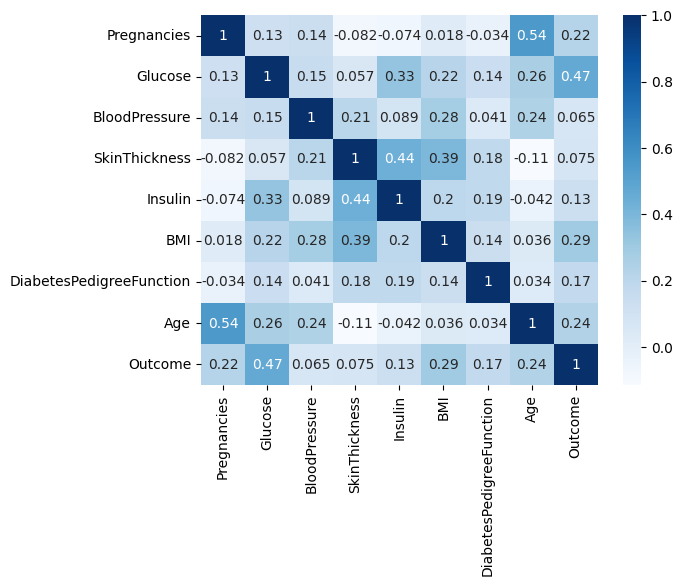

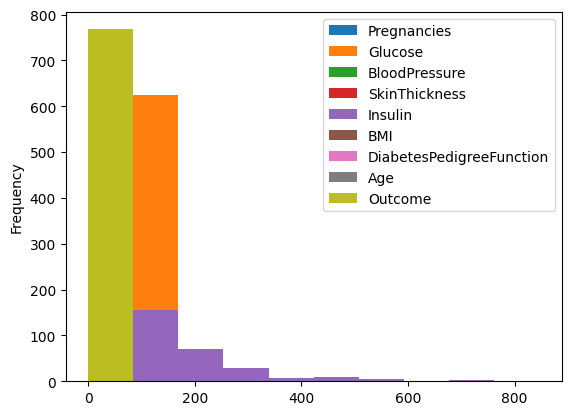

In [7]:
corrrlation=db.corr()
sns.heatmap(corrrlation,annot=True,cmap="Blues")
db.plot(kind="hist")
plt.show()

Detecting outlier

In [8]:
##Z_score for this we need mean and standard deviation annd set the threshold frequency for 3 if the value is above 3then its outlier
def Z_score(data):
  outliers=[]
  threshold=3#3rd standard deviation
  mean=np.mean(data)
  std=np.std(data)
  Z_score = (data-mean)/std
  print(Z_score)
  return Z_score


outliers=Z_score(db['Insulin'])
for i in range(len(outliers)):
  if outliers[i]>3:
   print( outliers[i])







0     -0.692891
1     -0.692891
2     -0.692891
3      0.123302
4      0.765836
         ...   
763    0.870031
764   -0.692891
765    0.279594
766   -0.692891
767   -0.692891
Name: Insulin, Length: 768, dtype: float64
4.021921913768962
6.65283937836845
3.6051429094759735
3.5183139502482677
3.6051429094759735
3.4575336787888737
5.76718399424585
5.211478655188532
4.039287705614503
3.344656031792856
4.334506166988703
3.4228020950977913
3.4748994706344147
4.516846981366886
3.1275836337235914
3.99587322600065
3.4748994706344147
3.7353863483175327


In [9]:
## detecting by using IQR
dataset=sorted(db['Insulin'])
Q1,Q3=np.percentile(db['Insulin'],[25,75])
IQR=Q3-Q1
lower_bound=Q1-(1.5*IQR)
upper_bound=Q3+(1.5*IQR)
print(lower_bound,upper_bound)

for i in range(len(db['Insulin'])):
  if db['Insulin'][i]<lower_bound or db['Insulin'][i]>upper_bound:
    db.drop(i,inplace=True)




-190.875 318.125


In [10]:
db.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [11]:
db['Outcome'].value_counts()

,count
Outcome,
0,485
1,249


0-->non diabetic
1-->diabetic

In [12]:
db.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.301031,108.791753,68.086598,19.367010,57.288660,30.168660,0.424715,31.247423
1,4.895582,139.421687,70.751004,21.188755,72.144578,35.136948,0.549120,36.959839


In [13]:
#separating the data and labels
X=db.drop(columns=['Outcome','BloodPressure','SkinThickness','Insulin','DiabetesPedigreeFunction'],axis=1)
Y=db['Outcome']

In [14]:
X

,Pregnancies,Glucose,BMI,Age
0,6,148,33.6,50
1,1,85,26.6,31
2,8,183,23.3,32
3,1,89,28.1,21
4,0,137,43.1,33
...,...,...,...,...
763,10,101,32.9,63
764,2,122,36.8,27
765,5,121,26.2,30
766,1,126,30.1,47


In [15]:
Y

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [16]:
#data standardization
scaler=StandardScaler()

In [17]:
scaler.fit(X)

StandardScaler()

In [18]:
standardize=scaler.transform(X)

In [19]:
standardize

array([[ 0.63831459,  0.92230173,  0.22061072,  1.43631516],
       [-0.84060873, -1.09401241, -0.66389796, -0.18666744],
       [ 1.22988392,  2.04247626, -1.08088062, -0.1012473 ],
       ...,
       [ 0.34252992,  0.0581671 , -0.71444131, -0.27208757],
       [-0.84060873,  0.21819203, -0.22164362,  1.18005475],
       [-0.84060873, -0.83797252, -0.18373611, -0.87002853]])

In [20]:
X=standardize
Y=db['Outcome']

In [21]:
X

array([[ 0.63831459,  0.92230173,  0.22061072,  1.43631516],
       [-0.84060873, -1.09401241, -0.66389796, -0.18666744],
       [ 1.22988392,  2.04247626, -1.08088062, -0.1012473 ],
       ...,
       [ 0.34252992,  0.0581671 , -0.71444131, -0.27208757],
       [-0.84060873,  0.21819203, -0.22164362,  1.18005475],
       [-0.84060873, -0.83797252, -0.18373611, -0.87002853]])

In [22]:
Y.shape

(734,)

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [24]:
X_test.shape,Y_test.shape


((147, 4), (147,))

In [25]:
X_train.shape

(587, 4)

In [26]:
#training model
Classifier=svm.SVC(kernel='linear')

In [27]:
#fit training data
Classifier.fit(X_train,Y_train)

SVC(kernel='linear')

In [28]:
#Module evaluation
x_accuracy_score=Classifier.predict(X_train)
accuracy_score=ac(x_accuracy_score,Y_train)

In [29]:
print("ACcuracy of training data",accuracy_score)

ACcuracy of training data 0.787052810902896


In [30]:
xt_accuracy_score = Classifier.predict(X_test)
test_accuracy = ac(Y_test, xt_accuracy_score)

In [31]:
test_accuracy

0.7414965986394558

In [32]:
input_data=(1.82781311e+00, -6.22642036e-01,  1.15169300e-01,
         2.53213620e+00
       	)

#changing the input_data to np array
input_data_as_np=np.asarray(input_data)#we cant do reshape in form of list so we converted into np.array

#reshape the array as we are predicting for one instance
input_data_reshaped=input_data_as_np.reshape(1,-1)#we did because model ask for 796 inputs how do we trained instead of this we need to predict for only one dataset
#standardize yhe input data
standardize=scaler.transform(input_data_reshaped)
print(standardize)
predict=Classifier.predict(standardize)

if predict==1:
  print("Person have diabets")
else:
  print("No diabetes")

[[-0.59575431 -3.83436391 -4.01047832 -2.61839625]]
No diabetes


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-0.84060873, -0.83797252, -1.18196733, -0.95544867],
       [ 0.04674526, -0.51792265, -0.99242975, -0.01582716],
       [ 0.34252992, -0.35789772,  0.53650667, -0.01582716],
       [ 0.34252992, -0.26188276, -1.00506559, -0.52834798],
       [ 0.04674526,  0.92230173, -0.12055691, -0.35750771],
       [ 0.93409925, -0.54992764,  0.67550089,  1.00921448],
       [ 0.93409925,  0.44222694,  1.05457604,  0.32585338],
       [ 0.04674526,  0.09017209,  0.39751245, -0.35750771],
       [-0.2490394 ,  0.34621198, -1.1061523 , -0.95544867],
       [ 0.63831459, -1.03000244, -1.09351646, -0.1012473 ],
       [-0.2490394 ,  2.29851615, -0.12055691,  0.06959297],
       [-1.1363934 , -0.54992764,  0.33433326, -0.78460839],
       [-0.54482407, -0.35789772, -0.82816386, -0.95544867],
       [ 1.52566858, -0.96599246, -1.18196733, -0.01582716],
       [ 0.04674526,  0.85829176, -0.37327368, -0.52834798],
       [-0.54482407, -1.44606726, -4.02503093, -0.95544867],
       [-0.84060873, -3.

LogisticRegression()

0.787052810902896


0.7346938775510204
